# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeatherMapKey
api_key = api_keys.api_key

#Endpoint for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

display(api_key)

'ab5c9b31ff53585d7f094b4ad41c7e24'

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval from WeatherMap API")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}{api_key}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval from WeatherMap API
-------------------------------
Processing Record 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ushuaia
Processing Record 2 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bluff
Processing Record 3 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=kodiak
City not found. Skipping...
Processing Record 4 | Gympie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=gympie
Processing Record 5 | Crotone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=crotone
City not found. Skipping...
Processing Record 6 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=amapa
Processing Record 7 | Clovis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=clovis
Processing Record 8 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port%20linco

Processing Record 72 | Oyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=oyama
Processing Record 73 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tiksi
Processing Record 74 | Vyazma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=vyazma
Processing Record 75 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=omsukchan
Processing Record 76 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=te%20anau
Processing Record 77 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=chokurdakh
Processing Record 78 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=barrow
Processing Record 79 | Phuntsholing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=phuntsholing
Processing Record 80 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tukt

Processing Record 143 | Shiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=shiraz
Processing Record 144 | Minas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=minas
Processing Record 145 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=cabo%20san%20lucas
Processing Record 146 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=atar
Processing Record 147 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=flin%20flon
Processing Record 148 | Wamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=wamba
Processing Record 149 | Calabozo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=calabozo
Processing Record 150 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=saint%20george
Processing Record 151 | Ternate
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 212 | Ashtabula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ashtabula
Processing Record 213 | Tarnogskiy Gorodok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tarnogskiy%20gorodok
Processing Record 214 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=komsomolskiy
Processing Record 215 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bethel
Processing Record 216 | Bembereke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bembereke
Processing Record 217 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=guerrero%20negro
City not found. Skipping...
Processing Record 218 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tuatapere
Processing Record 219 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=nantucket
Processing Record 22

Processing Record 282 | Pryozerne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=pryozerne
Processing Record 283 | Riosucio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=riosucio
Processing Record 284 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=grindavik
Processing Record 285 | Rabo de Peixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=rabo%20de%20peixe
Processing Record 286 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=cabedelo
Processing Record 287 | Slavuta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=slavuta
Processing Record 288 | Kolondieba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=kolondieba
Processing Record 289 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=quatre%20cocos
Processing Record 290 | Verkhnyaya Inta
http://api.openweathermap.

Processing Record 350 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=palmer
Processing Record 351 | Taseyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=taseyevo
Processing Record 352 | Aksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=aksha
Processing Record 353 | Ambovombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ambovombe
Processing Record 354 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=codrington
Processing Record 355 | Necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=necochea
Processing Record 356 | Shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=shelburne
Processing Record 357 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=kununurra
Processing Record 358 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 420 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tilichiki
Processing Record 421 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=touros
Processing Record 422 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=luanda
City not found. Skipping...
Processing Record 423 | Svecha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=svecha
Processing Record 424 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=maragogi
Processing Record 425 | Fort Frances
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=fort%20frances
Processing Record 426 | Bakhmach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=bakhmach
Processing Record 427 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 490 | Miandrivazo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=miandrivazo
Processing Record 491 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port%20macquarie
Processing Record 492 | Kamakhyanagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=kamakhyanagar
Processing Record 493 | Macamic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=macamic
City not found. Skipping...
City not found. Skipping...
Processing Record 494 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=qasigiannguit
Processing Record 495 | Ramhormoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ramhormoz
Processing Record 496 | Soavinandriana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=soavinandriana
Processing Record 497 | Corredor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_data = pd.DataFrame(weatherpy_dict)

# Display count
weather_data.count()

City          511
Cloudiness    511
Country       511
Date          511
Humidity      511
Lat           511
Lng           511
Max Temp      511
Wind Speed    511
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
# sort by humidity and delete first two entries

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1561222686,86,-54.81,-68.31,33.80,6.93
1,Bluff,39,AU,1561222687,62,-23.58,149.07,55.47,4.25
2,Kodiak,75,US,1561222688,74,39.95,-94.76,80.01,16.11
3,Gympie,0,AU,1561222690,86,-26.20,152.66,48.99,1.01
4,Crotone,0,IT,1561222691,58,39.09,17.12,84.20,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

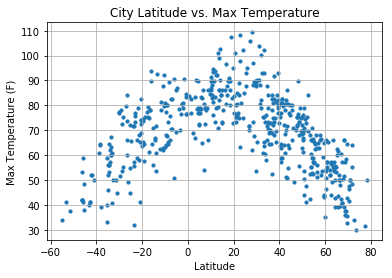

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

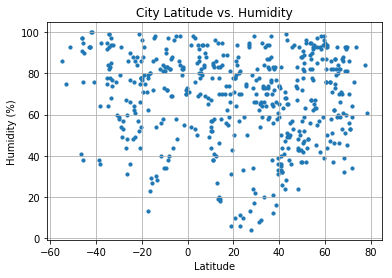

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

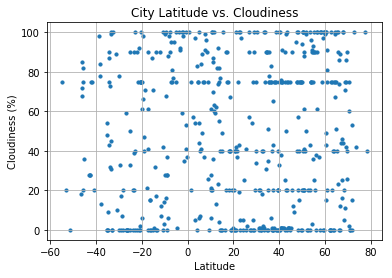

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

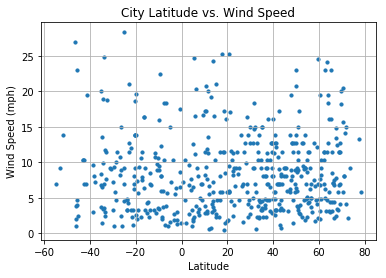

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeed_v_Latitude.png")
plt.show()